In [8]:
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

In [9]:
import warnings
import os
import umap.plot
from umap import umap_
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import hdbscan
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

warnings.filterwarnings('ignore')

In [10]:
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\test.csv
./data\train.csv


In [11]:
PATH = "./data/"

In [12]:
train_df = pd.read_csv(PATH + "train.csv")

In [13]:
test_df = pd.read_csv(PATH + "test.csv")

In [14]:
train_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [15]:
train_df['Arrival Delay in Minutes'].fillna(0.0, inplace=True)
test_df['Arrival Delay in Minutes'].fillna(0.0, inplace=True)

train_df.drop(columns=['id'], inplace=True)

In [16]:
train_df.select_dtypes(include='object')

Gender      Customer Type   Type of Travel     Class  \
0         Male     Loyal Customer  Personal Travel  Eco Plus   
1         Male  disloyal Customer  Business travel  Business   
2       Female     Loyal Customer  Business travel  Business   
3       Female     Loyal Customer  Business travel  Business   
4         Male     Loyal Customer  Business travel  Business   
...        ...                ...              ...       ...   
103899  Female  disloyal Customer  Business travel       Eco   
103900    Male     Loyal Customer  Business travel  Business   
103901    Male  disloyal Customer  Business travel  Business   
103902  Female  disloyal Customer  Business travel       Eco   
103903    Male     Loyal Customer  Business travel  Business   

                   satisfaction  
0       neutral or dissatisfied  
1       neutral or dissatisfied  
2                     satisfied  
3       neutral or dissatisfied  
4                     satisfied  
...                         ...  
103899  neutral or dissatisfied  
103900                satisfied  
103901  neutral or dissatisfied  
103902  neutral or dissatisfied  
103903  neutral or dissatisfied  

[103904 rows x 5 columns]

In [17]:
train_df['Gender'] = train_df['Gender'].map({'Female':0, 'Male':1})
train_df['Customer Type'] = train_df['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})
train_df['Type of Travel'] = train_df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
train_df['Class'] = train_df['Class'].map({'Eco':1, 'Eco Plus':2, 'Business':3})
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

In [18]:
test_df['Gender'] = test_df['Gender'].map({'Female':0, 'Male':1})
test_df['Customer Type'] = test_df['Customer Type'].map({'disloyal Customer':0, 'Loyal Customer':1})
test_df['Type of Travel'] = test_df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
test_df['Class'] = test_df['Class'].map({'Eco':1, 'Eco Plus':2, 'Business':3})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

In [19]:
train_df.head()

Unnamed: 0  Gender  Customer Type  Age  Type of Travel  Class  \
0           0       1              1   13               0      2   
1           1       1              0   25               1      3   
2           2       0              1   26               1      3   
3           3       0              1   25               1      3   
4           4       1              1   61               1      3   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          25                      18.0             0  
1                           1                       6.0             0  
2                           0                       0.0             1  
3                          11                       9.0             0  
4                           0                       0.0             1

In [20]:
train_df.shape

(103904, 24)

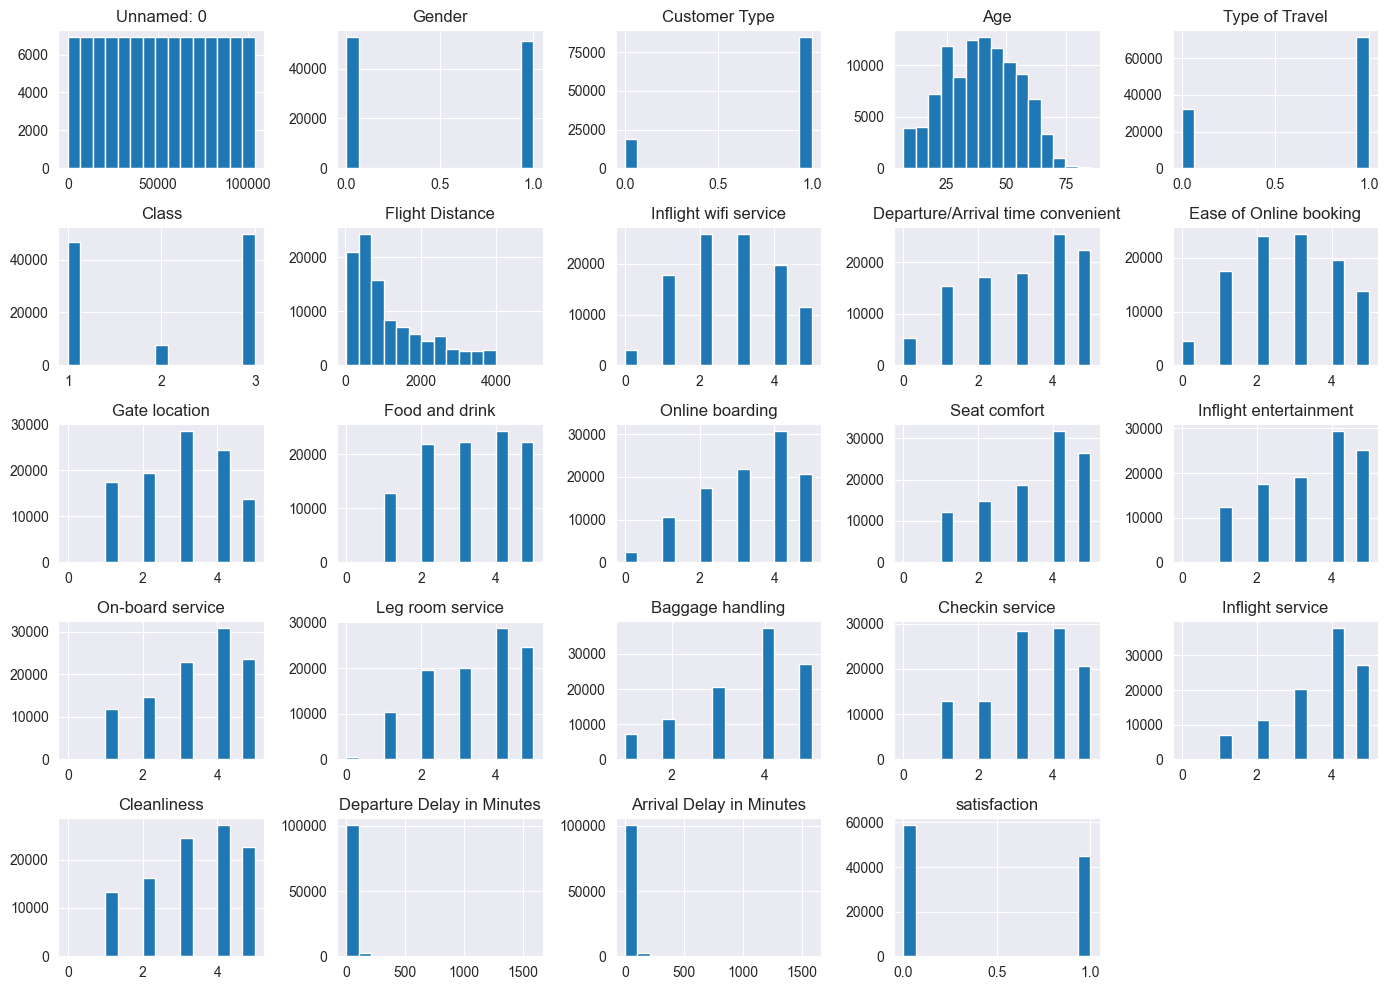

In [21]:
train_df.hist(figsize=(14,10), bins=15)
plt.tight_layout()
plt.show()

In [22]:
#We first need to scale the data. We don't have negative values so we can use standard scaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)

In [23]:
umap_data = umap_.UMAP(n_neighbors=100, n_components=2, metric='euclidean', n_epochs=100, learning_rate=0.1, init='spectral',
                 min_dist=0.1, spread=1.0, low_memory=False, set_op_mix_ratio=1.0, local_connectivity=1,
                 repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, random_state=3,
                 angular_rp_forest=False, target_n_neighbors=-1, transform_seed=3, verbose=False, unique=False)

In [24]:
umap_fit = umap_data.fit(train_scaled)

<Axes: >

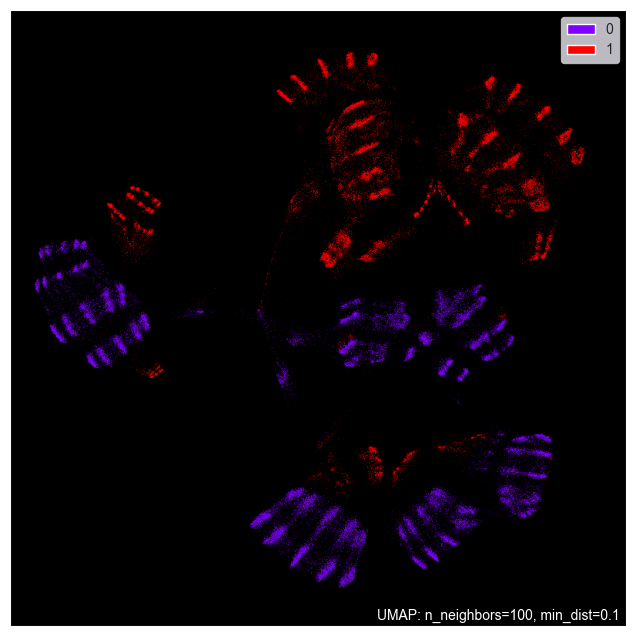

In [25]:
umap.plot.points(umap_fit, labels=train_df.satisfaction, theme='fire')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
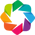

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [26]:
u_plot = umap.plot.interactive(umap_fit, labels=train_df.satisfaction, point_size=2)
umap.plot.show(u_plot)

In [27]:
train_df.head()

Unnamed: 0  Gender  Customer Type  Age  Type of Travel  Class  \
0           0       1              1   13               0      2   
1           1       1              0   25               1      3   
2           2       0              1   26               1      3   
3           3       0              1   25               1      3   
4           4       1              1   61               1      3   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          25                      18.0             0  
1                           1                       6.0             0  
2                           0                       0.0             1  
3                          11                       9.0             0  
4                           0                       0.0             1

In [28]:
test_df.head()

Unnamed: 0     id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0  19556       0              1   52               1      1   
1           1  90035       0              1   36               1      3   
2           2  12360       1              0   20               1      1   
3           3  77959       1              1   44               1      3   
4           4  36875       0              1   49               1      1   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              4               3                4   
1                       3              1               5                4   
2                       2              4               2                2   
3                       0              2               3                4   
4                       4              3               4                1   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             3                       5                 5                 5   
1             5                       4                 4                 4   
2             2                       2                 4                 1   
3             4                       1                 1                 1   
4             2                       2                 2                 2   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   
2                 3                2                 2            2   
3                 1                3                 1            4   
4                 2                4                 2            4   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          50                      44.0             1  
1                           0                       0.0             1  
2                           0                       0.0             0  
3                           0                       6.0             1  
4                           0                      20.0             1

In [29]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [30]:
X_train, y_train = train_df.loc[:, :'Arrival Delay in Minutes'], train_df['satisfaction']

In [31]:
X_test, y_test = test_df.loc[:, :'Arrival Delay in Minutes'], test_df['satisfaction']

In [32]:
X_train.shape

(103904, 22)

In [33]:
X_test.shape

(25976, 22)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
umap_data2 = umap_.UMAP(n_neighbors=100, n_components=2, metric='euclidean', n_epochs=100, learning_rate=0.1, init='spectral',
                 min_dist=0.1, spread=1.0, low_memory=False, set_op_mix_ratio=1.0, local_connectivity=1,
                 repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, random_state=3,  
                 angular_rp_forest=False, target_n_neighbors=-1, transform_seed=3, verbose=False, unique=False)

In [36]:
X_train_umap = umap_data2.fit_transform(X_train_scaled, y_train)

In [37]:
X_test_umap = umap_data2.transform(X_test_scaled)

In [38]:
X_train_umap.shape

(103904, 2)

In [39]:
X_test_umap.shape

(25976, 2)

In [40]:
y_test.shape

(25976,)

In [41]:
X_train_umap[:,0].shape

(103904,)

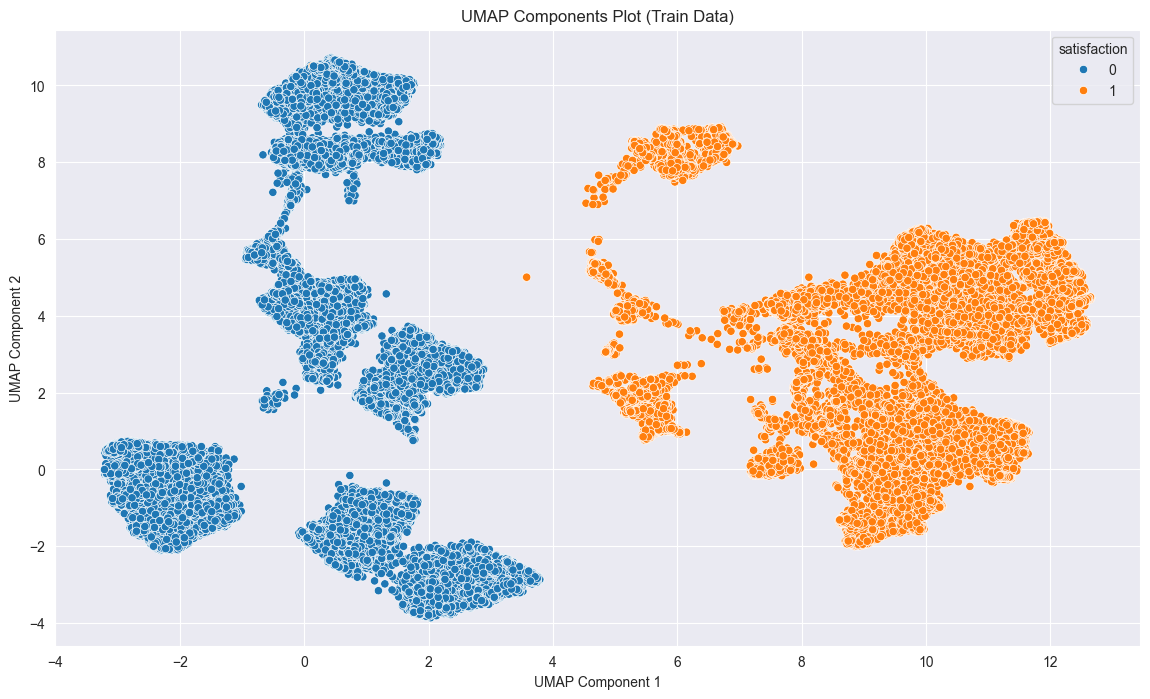

In [42]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_train_umap[:,0], y=X_train_umap[:,1], hue=y_train)
plt.title('UMAP Components Plot (Train Data)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

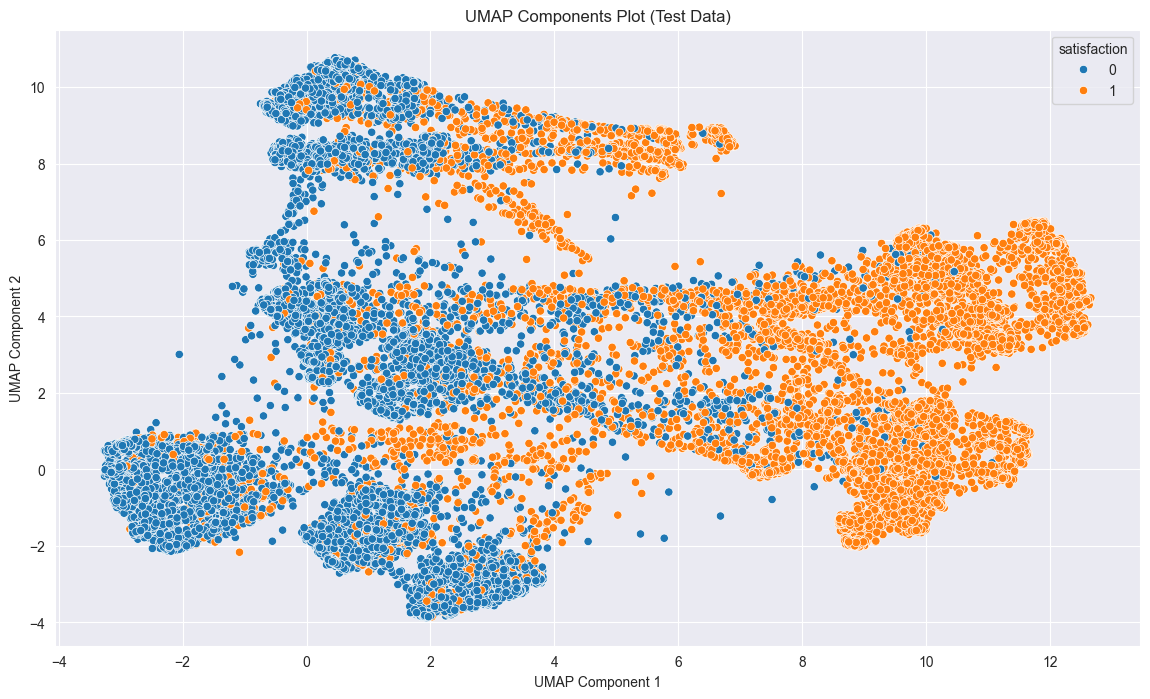

In [43]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_test_umap[:,0], y=X_test_umap[:,1], hue=y_test)
plt.title('UMAP Components Plot (Test Data)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [44]:
train_df_umap = pd.concat([train_df, pd.DataFrame(X_train_umap, columns=['UMAP1', 'UMAP2'])], axis=1)

In [45]:
#Now we can try to apply K-Means and DBSCAN
train_df_umap

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              1   13               0      2              460   
1            1              0   25               1      3              235   
2            0              1   26               1      3             1142   
3            0              1   25               1      3              562   
4            1              1   61               1      3              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              0   23               1      1              192   
103900       1              1   49               1      3             2347   
103901       1              0   30               1      3             1995   
103902       0              0   22               1      1             1000   
103903       1              1   27               1      3             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Seat comfort  Inflight entertainment  \
0                     3             5                       5   
1                     3             1                       1   
2                     5             5                       5   
3                     2             2                       2   
4                     5             5                       3   
...                 ...           ...                     ...   
103899                2             2                       2   
103900                4             5                       5   
103901                1             5                       4   
103902                1             1                       1   
103903                1             1                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5  

In [46]:
wcss = []

for i in range(1, 18):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(X_train_umap)
    wcss.append(kmeans.inertia_)

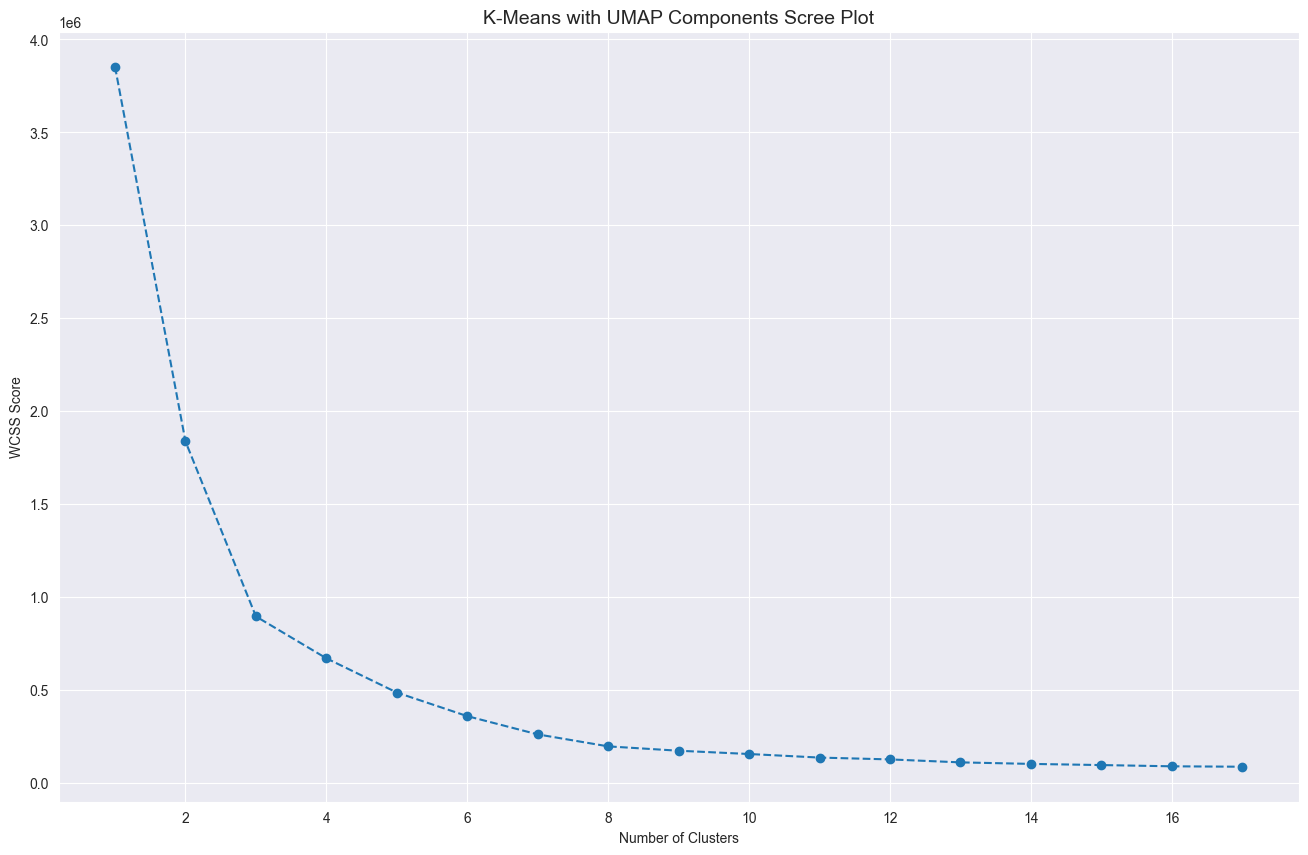

In [47]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with UMAP Components Scree Plot', fontsize=14)
plt.show()

In [48]:
kmeans_umap = KMeans(n_clusters=3, init='k-means++', random_state=3)
kmeans_umap.fit(X_train_umap)

KMeans(n_clusters=3, random_state=3)

In [49]:
train_df_umap['K-Means UMAP Segment'] = kmeans_umap.labels_
train_df_umap

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              1   13               0      2              460   
1            1              0   25               1      3              235   
2            0              1   26               1      3             1142   
3            0              1   25               1      3              562   
4            1              1   61               1      3              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              0   23               1      1              192   
103900       1              1   49               1      3             2347   
103901       1              0   30               1      3             1995   
103902       0              0   22               1      1             1000   
103903       1              1   27               1      3             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Seat comfort  Inflight entertainment  \
0                     3             5                       5   
1                     3             1                       1   
2                     5             5                       5   
3                     2             2                       2   
4                     5             5                       3   
...                 ...           ...                     ...   
103899                2             2                       2   
103900                4             5                       5   
103901                1             5                       4   
103902                1             1                       1   
103903                1             1                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5  

In [50]:
#Attribute averages for each K-Means segment
train_df_umap_freq = train_df_umap.groupby(['K-Means UMAP Segment']).mean()
train_df_umap_freq

Gender  Customer Type        Age  Type of Travel  \
K-Means UMAP Segment                                                       
0                     0.447875       0.999158  39.627204        0.280464   
1                     0.501354       0.997490  43.247834        0.919718   
2                     0.550338       0.217586  32.451987        0.967119   

                         Class  Flight Distance  Inflight wifi service  \
K-Means UMAP Segment                                                     
0                     1.592140      1011.308868               2.383233   
1                     2.600856      1617.218572               3.100660   
2                     1.771163       757.648566               2.667497   

                      Departure/Arrival time convenient  \
K-Means UMAP Segment                                      
0                                              3.452188   
1                                              2.996677   
2                                              2.530078   

                      Ease of Online booking  Gate location  Food and drink  \
K-Means UMAP Segment                                                          
0                                   2.553426       2.948373        2.997856   
1                                   2.961213       2.994832        3.567139   
2                                   2.743264       2.992984        2.918711   

                      Online boarding  Seat comfort  Inflight entertainment  \
K-Means UMAP Segment                                                          
0                            2.752252      3.113436                2.871150   
1                            4.069305      4.069157                4.059018   
2                            2.679288      2.907336                2.968157   

                      On-board service  Leg room service  Baggage handling  \
K-Means UMAP Segment                                                         
0                             3.044966          2.904708          3.313947   
1                             3.872145          3.870988          3.950359   
2                             3.105036          3.200108          3.611658   

                      Checkin service  Inflight service  Cleanliness  \
K-Means UMAP Segment                                                   
0                            3.105117          3.346944     2.940207   
1                            3.635607          3.953116     3.815982   
2                            3.069415          3.590401     2.956034   

                      Departure Delay in Minutes  Arrival Delay in Minutes  \
K-Means UMAP Segment                                                         
0                                      11.451474                 11.942325   
1                                      12.979253                 12.990352   
2                                      23.386183                 23.939719   

                      satisfaction     UMAP1     UMAP2  
K-Means UMAP Segment                                    
0                         0.000077  0.272078 -0.280905  
1                         0.999975  9.552045  2.444820  
2                         0.182298  1.397863  7.889482

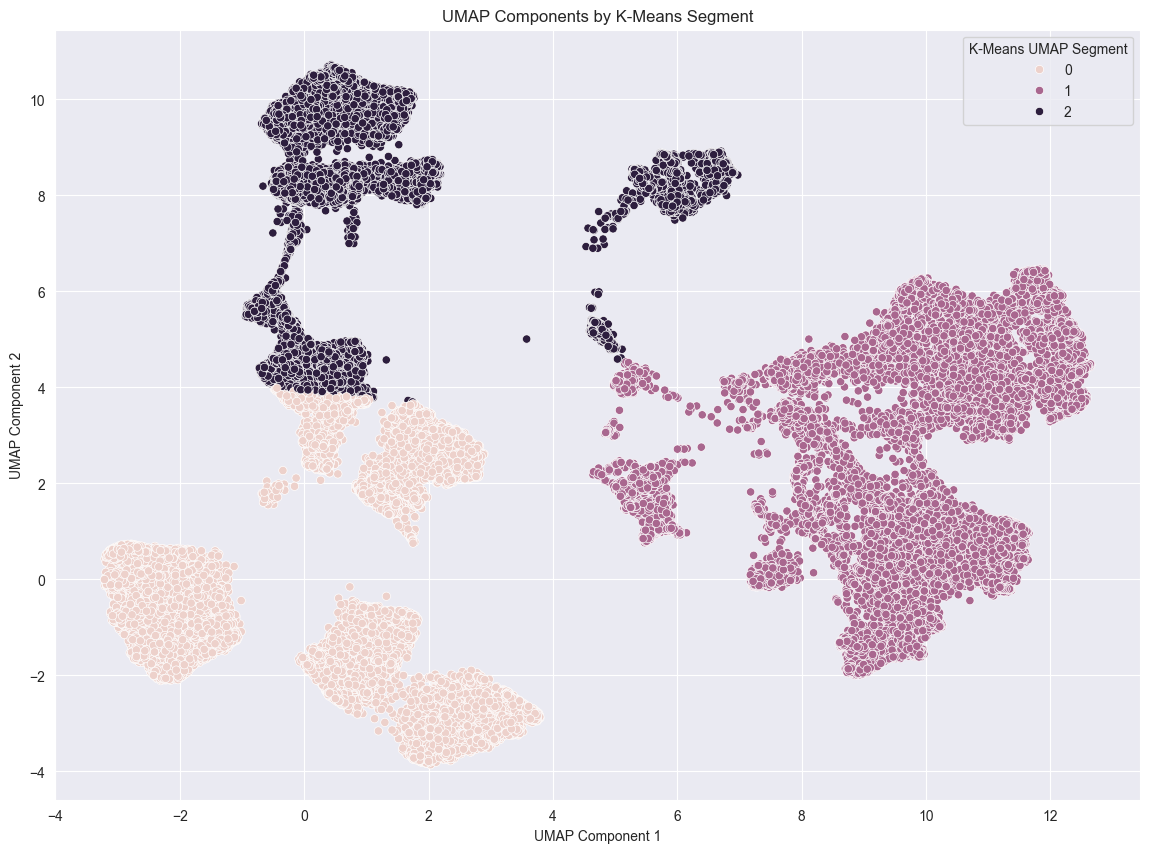

In [51]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='UMAP1' ,y='UMAP2', hue='K-Means UMAP Segment', data=train_df_umap)
plt.title('UMAP Components by K-Means Segment')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [52]:
train_df_umap['K-Means UMAP Segment'].value_counts()

K-Means UMAP Segment
1    40632
0    39185
2    24087
Name: count, dtype: int64

In [53]:
train_df_umap.drop(columns=['K-Means UMAP Segment'], inplace=True)
train_df_umap.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              1   13               0      2              460   
1       1              0   25               1      3              235   
2       0              1   26               1      3             1142   
3       0              1   25               1      3              562   
4       1              1   61               1      3              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          25                      18.0             0   
1                           1                       6.0             0   
2                           0                       0.0             1   
3                          11                       9.0             0   
4                           0                       0.0             1   

       UMAP1     UMAP2  
0  -1.977537 -1.935598  
1   1.212871  8.108482  
2   9.347492 -0.285797  
3   1.560433  3.129891  
4  10.567511  4.997871

In [54]:
dbscan_umap = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', n_jobs=-1)

In [55]:
dbscan_umap.fit(X_train_umap)

DBSCAN(n_jobs=-1)

In [56]:
print(np.unique(dbscan_umap.labels_))

[-1  0  1  2  3  4  5]


In [57]:
train_df_umap['DBSCAN UMAP Segment'] = dbscan_umap.labels_
train_df_umap

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              1   13               0      2              460   
1            1              0   25               1      3              235   
2            0              1   26               1      3             1142   
3            0              1   25               1      3              562   
4            1              1   61               1      3              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              0   23               1      1              192   
103900       1              1   49               1      3             2347   
103901       1              0   30               1      3             1995   
103902       0              0   22               1      1             1000   
103903       1              1   27               1      3             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Seat comfort  Inflight entertainment  \
0                     3             5                       5   
1                     3             1                       1   
2                     5             5                       5   
3                     2             2                       2   
4                     5             5                       3   
...                 ...           ...                     ...   
103899                2             2                       2   
103900                4             5                       5   
103901                1             5                       4   
103902                1             1                       1   
103903                1             1                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5  

In [58]:
#Attribute averages for each K-Means segment
train_df_umap_freq = train_df_umap.groupby(['DBSCAN UMAP Segment']).mean()
train_df_umap_freq

Gender  Customer Type        Age  Type of Travel  \
DBSCAN UMAP Segment                                                       
-1                   0.000000       0.000000  21.500000        1.000000   
 0                   0.999926       0.998743  37.866262        0.000074   
 1                   0.476928       0.528580  36.849345        0.974418   
 2                   0.500516       0.979787  43.261512        0.981308   
 3                   0.036517       0.999455  38.789481        0.000545   
 4                   0.500591       0.996847  37.694915        0.000000   
 5                   0.488366       0.000000  28.698052        0.996212   

                        Class  Flight Distance  Inflight wifi service  \
DBSCAN UMAP Segment                                                     
-1                   1.000000      1340.000000               2.500000   
 0                   1.177084       779.318885               2.398402   
 1                   1.949945      1058.820635               2.399857   
 2                   2.683520      1653.480457               2.954777   
 3                   1.305082       794.805151               2.400600   
 4                   1.243595       807.793851               4.496650   
 5                   2.322240       733.702922               4.411797   

                     Departure/Arrival time convenient  \
DBSCAN UMAP Segment                                      
-1                                            2.000000   
 0                                            3.655670   
 1                                            2.652578   
 2                                            2.921518   
 3                                            3.639801   
 4                                            3.685455   
 5                                            2.994048   

                     Ease of Online booking  Gate location  Food and drink  \
DBSCAN UMAP Segment                                                          
-1                                 2.000000       3.500000        2.000000   
 0                                 2.370664       2.927657        3.050078   
 1                                 2.707749       3.027667        2.836342   
 2                                 2.822848       2.997912        3.586655   
 3                                 2.371985       2.912658        3.127470   
 4                                 4.297596       2.898305        3.131652   
 5                                 4.357143       2.823323        3.105519   

                     Online boarding  Seat comfort  Inflight entertainment  \
DBSCAN UMAP Segment                                                          
-1                          2.500000      2.500000                2.000000   
 0                          2.375028      3.002885                3.063096   
 1                          2.603793      2.887375                2.742945   
 2                          3.997834      4.107590                4.107023   
 3                          3.023777      3.378458                3.054708   
 4                          4.119038      3.205755                3.065037   
 5                          4.280574      3.010011                3.093615   

                     On-board service  Leg room service  Baggage handling  \
DBSCAN UMAP Segment                                                         
-1                           4.000000          5.000000          5.000000   
 0                           3.358976          3.245580          3.754420   
 1                           2.782735          2.946360          3.197452   
 2                           3.907209          3.887124          3.976718   
 3                           3.200368          2.848821          3.400531   
 4                           3.285376          3.490343          3.582184   
 5                           3.727543          3.369318          4.122565   

                     Checkin service  Inflight service  Cleanlines

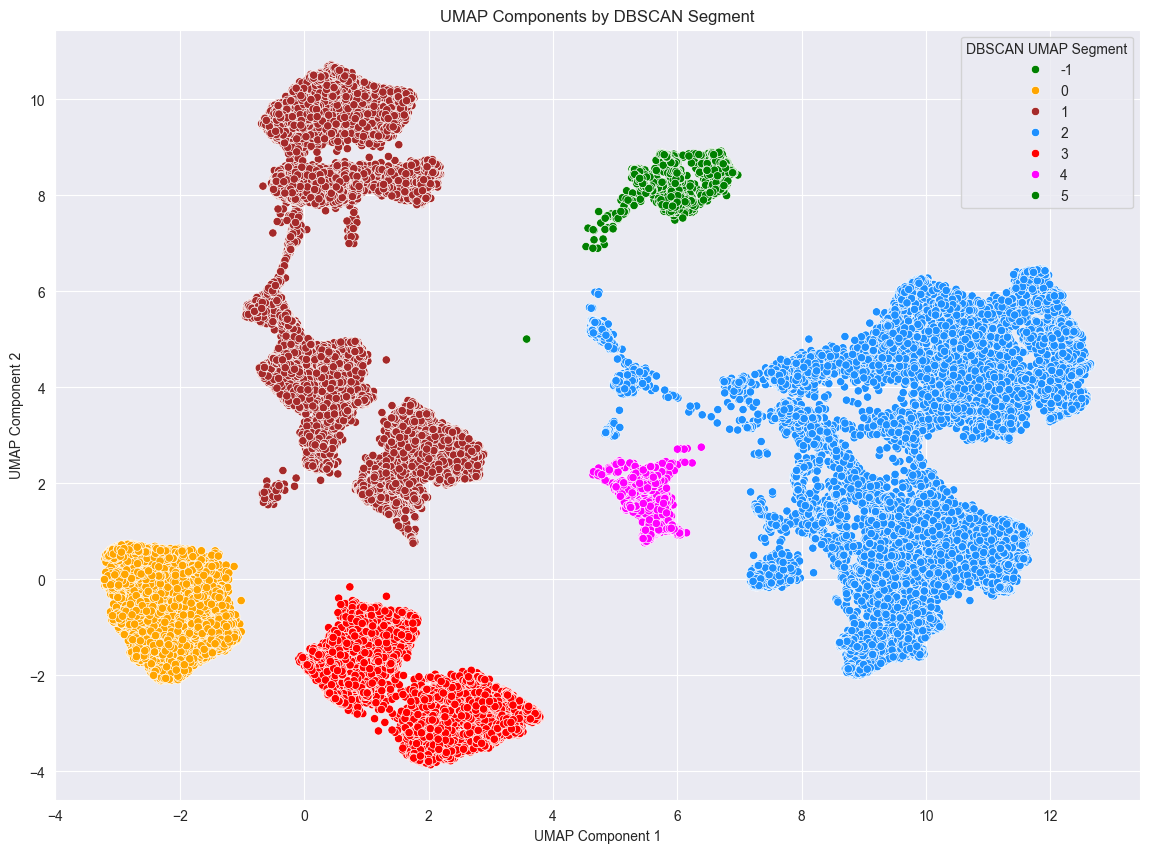

In [59]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='UMAP1' ,y='UMAP2', hue='DBSCAN UMAP Segment', data=train_df_umap, palette=['green','orange','brown','dodgerblue','red', 'magenta'])
plt.title('UMAP Components by DBSCAN Segment')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [60]:
#First trying the default number of components
pca = PCA()
pca.fit(train_scaled)
print(pca.explained_variance_ratio_)

[0.18874275 0.09892593 0.09175352 0.08254647 0.08039679 0.06240937
 0.04267975 0.04161074 0.04054502 0.03889809 0.03433098 0.02886388
 0.0241179  0.02008567 0.01954351 0.01793844 0.01666211 0.01528229
 0.01316882 0.01219472 0.01089658 0.00949441 0.00725859 0.00165367]


In [61]:
len(pca.explained_variance_ratio_)

24

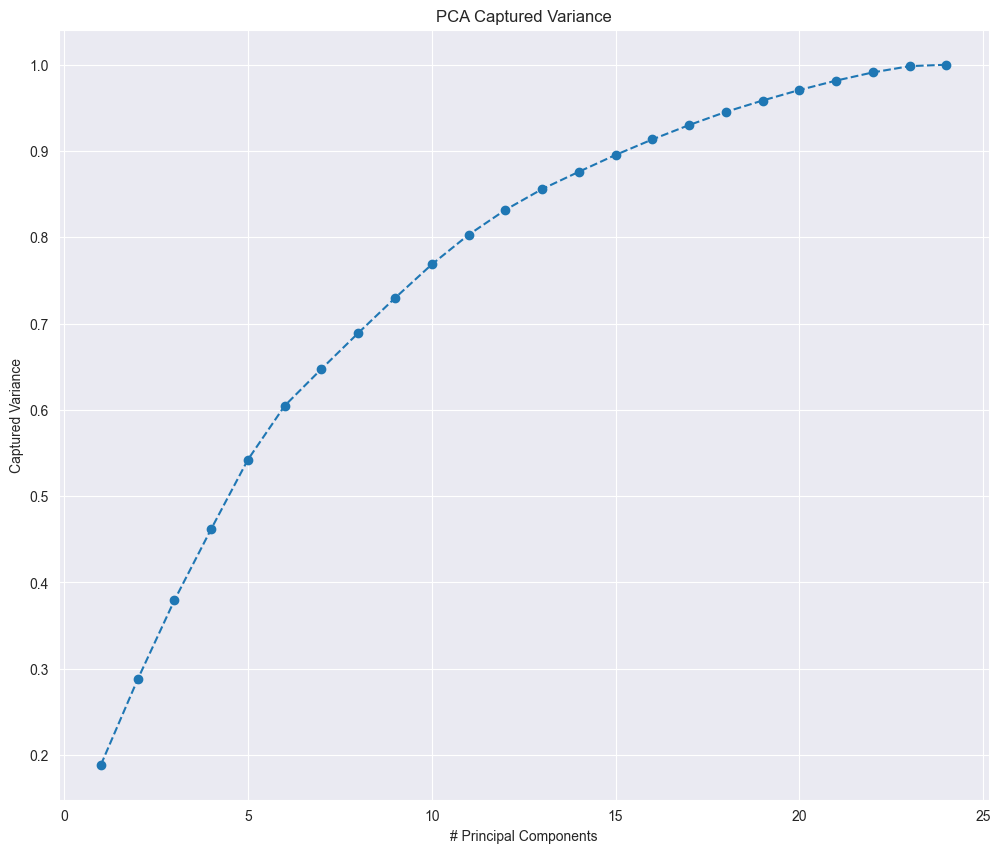

In [62]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 25), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

In [63]:
test_df_umap = pd.concat([test_df, pd.DataFrame(X_test_umap, columns=['UMAP1', 'UMAP2'])], axis=1)

In [64]:
train_df_umap

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              1   13               0      2              460   
1            1              0   25               1      3              235   
2            0              1   26               1      3             1142   
3            0              1   25               1      3              562   
4            1              1   61               1      3              214   
...        ...            ...  ...             ...    ...              ...   
103899       0              0   23               1      1              192   
103900       1              1   49               1      3             2347   
103901       1              0   30               1      3             1995   
103902       0              0   22               1      1             1000   
103903       1              1   27               1      3             1723   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Seat comfort  Inflight entertainment  \
0                     3             5                       5   
1                     3             1                       1   
2                     5             5                       5   
3                     2             2                       2   
4                     5             5                       3   
...                 ...           ...                     ...   
103899                2             2                       2   
103900                4             5                       5   
103901                1             5                       4   
103902                1             1                       1   
103903                1             1                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5  

In [65]:
test_df_umap

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0           0              1   52               1      1              160   
1           0              1   36               1      3             2863   
2           1              0   20               1      1              192   
3           1              1   44               1      3             3377   
4           0              1   49               1      1             1182   
...       ...            ...  ...             ...    ...              ...   
25971       1              0   34               1      3              526   
25972       1              1   23               1      3              646   
25973       0              1   17               0      1              828   
25974       1              1   14               1      3             1127   
25975       0              1   42               0      1              264   

       Inflight wifi service  Departure/Arrival time convenient  \
0                          5                                  4   
1                          1                                  1   
2                          2                                  0   
3                          0                                  0   
4                          2                                  3   
...                      ...                                ...   
25971                      3                                  3   
25972                      4                                  4   
25973                      2                                  5   
25974                      3                                  3   
25975                      2                                  5   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                           3              4               3                4   
1                           3              1               5                4   
2                           2              4               2                2   
3                           0              2               3                4   
4                           4              3               4                1   
...                       ...            ...             ...              ...   
25971                       3              1               4                3   
25972                       4              4               4                4   
25973                       1              5               2                1   
25974                       3              3               4                4   
25975                       2              5               4                2   

       Seat comfort  Inflight entertainment  On-board service  \
0                 3                       5                 5   
1                 5                       4                 4   
2                 2                       2                 4   
3                 4                       1                 1   
4                 2                       2                 2   
...             ...                     ...               ...   
25971             4                       4                 3   
25972             4                       4                 4   
25973             2                       2                 4   
25974             4                       4                 3   
25975             2                       1                 1   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
0                     5                 5                2                 5   
1                     4                 4                3                 4   
2                     1                 3                2                 2   
3                     1                 1                3                 1   
4                     2                 2                4                 2   
...                 ...               ...  

In [66]:
train_df_umap.groupby(['DBSCAN UMAP Segment']).mean()

Gender  Customer Type        Age  Type of Travel  \
DBSCAN UMAP Segment                                                       
-1                   0.000000       0.000000  21.500000        1.000000   
 0                   0.999926       0.998743  37.866262        0.000074   
 1                   0.476928       0.528580  36.849345        0.974418   
 2                   0.500516       0.979787  43.261512        0.981308   
 3                   0.036517       0.999455  38.789481        0.000545   
 4                   0.500591       0.996847  37.694915        0.000000   
 5                   0.488366       0.000000  28.698052        0.996212   

                        Class  Flight Distance  Inflight wifi service  \
DBSCAN UMAP Segment                                                     
-1                   1.000000      1340.000000               2.500000   
 0                   1.177084       779.318885               2.398402   
 1                   1.949945      1058.820635               2.399857   
 2                   2.683520      1653.480457               2.954777   
 3                   1.305082       794.805151               2.400600   
 4                   1.243595       807.793851               4.496650   
 5                   2.322240       733.702922               4.411797   

                     Departure/Arrival time convenient  \
DBSCAN UMAP Segment                                      
-1                                            2.000000   
 0                                            3.655670   
 1                                            2.652578   
 2                                            2.921518   
 3                                            3.639801   
 4                                            3.685455   
 5                                            2.994048   

                     Ease of Online booking  Gate location  Food and drink  \
DBSCAN UMAP Segment                                                          
-1                                 2.000000       3.500000        2.000000   
 0                                 2.370664       2.927657        3.050078   
 1                                 2.707749       3.027667        2.836342   
 2                                 2.822848       2.997912        3.586655   
 3                                 2.371985       2.912658        3.127470   
 4                                 4.297596       2.898305        3.131652   
 5                                 4.357143       2.823323        3.105519   

                     Online boarding  Seat comfort  Inflight entertainment  \
DBSCAN UMAP Segment                                                          
-1                          2.500000      2.500000                2.000000   
 0                          2.375028      3.002885                3.063096   
 1                          2.603793      2.887375                2.742945   
 2                          3.997834      4.107590                4.107023   
 3                          3.023777      3.378458                3.054708   
 4                          4.119038      3.205755                3.065037   
 5                          4.280574      3.010011                3.093615   

                     On-board service  Leg room service  Baggage handling  \
DBSCAN UMAP Segment                                                         
-1                           4.000000          5.000000          5.000000   
 0                           3.358976          3.245580          3.754420   
 1                           2.782735          2.946360          3.197452   
 2                           3.907209          3.887124          3.976718   
 3                           3.200368          2.848821          3.400531   
 4                           3.285376          3.490343          3.582184   
 5                           3.727543          3.369318          4.122565   

                     Checkin service  Inflight service  Cleanlines

In [67]:
# I will attempt to give the clusters appropriate names
train_df_umap['DBSCAN UMAP Segment'] = train_df_umap['DBSCAN UMAP Segment'].map({
    -1: 'Outlier',
    0: 'Dissatisfied Male Personal Travlers',
    1: 'Dissatisfied Business Travelers',
    2: 'Satisfied Long Distance Business Travelers',
    3: 'Dissatisfied Female Personal Travelers',
    4: 'Satisfied Disloyal Business Travelers'
})

In [68]:
train_df_umap_freq = train_df_umap.groupby(['DBSCAN UMAP Segment']).mean()
train_df_umap_freq['Obs.'] = train_df_umap[['DBSCAN UMAP Segment', 'Gender']].groupby(['DBSCAN UMAP Segment']).count()
train_df_umap_freq['Obs. Prop.'] = train_df_umap_freq['Obs.'] / train_df_umap_freq['Obs.'].sum()

train_df_umap_freq

Gender  Customer Type  \
DBSCAN UMAP Segment                                                   
Dissatisfied Business Travelers             0.476928       0.528580   
Dissatisfied Female Personal Travelers      0.036517       0.999455   
Dissatisfied Male Personal Travlers         0.999926       0.998743   
Outlier                                     0.000000       0.000000   
Satisfied Disloyal Business Travelers       0.500591       0.996847   
Satisfied Long Distance Business Travelers  0.500516       0.979787   

                                                  Age  Type of Travel  \
DBSCAN UMAP Segment                                                     
Dissatisfied Business Travelers             36.849345        0.974418   
Dissatisfied Female Personal Travelers      38.789481        0.000545   
Dissatisfied Male Personal Travlers         37.866262        0.000074   
Outlier                                     21.500000        1.000000   
Satisfied Disloyal Business Travelers       37.694915        0.000000   
Satisfied Long Distance Business Travelers  43.261512        0.981308   

                                               Class  Flight Distance  \
DBSCAN UMAP Segment                                                     
Dissatisfied Business Travelers             1.949945      1058.820635   
Dissatisfied Female Personal Travelers      1.305082       794.805151   
Dissatisfied Male Personal Travlers         1.177084       779.318885   
Outlier                                     1.000000      1340.000000   
Satisfied Disloyal Business Travelers       1.243595       807.793851   
Satisfied Long Distance Business Travelers  2.683520      1653.480457   

                                            Inflight wifi service  \
DBSCAN UMAP Segment                                                 
Dissatisfied Business Travelers                          2.399857   
Dissatisfied Female Personal Travelers                   2.400600   
Dissatisfied Male Personal Travlers                      2.398402   
Outlier                                                  2.500000   
Satisfied Disloyal Business Travelers                    4.496650   
Satisfied Long Distance Business Travelers               2.954777   

                                            Departure/Arrival time convenient  \
DBSCAN UMAP Segment                                                             
Dissatisfied Business Travelers                                      2.652578   
Dissatisfied Female Personal Travelers                               3.639801   
Dissatisfied Male Personal Travlers                                  3.655670   
Outlier                                                              2.000000   
Satisfied Disloyal Business Travelers                                3.685455   
Satisfied Long Distance Business Travelers                           2.921518   

                                            Ease of Online booking  \
DBSCAN UMAP Segment                                                  
Dissatisfied Business Travelers                           2.707749   
Dissatisfied Female Personal Travelers                    2.371985   
Dissatisfied Male Personal Travlers                       2.370664   
Outlier                                                   2.000000   
Satisfied Disloyal Business Travelers                     4.297596   
Satisfied Long Distance Business Travelers                2.822848   

                                            Gate location  Food and drink  \
DBSCAN UMAP Segment                                                         
Dissatisfied Business Travelers                  3.027667        2.836342   
Dissatisfied Female Personal Travelers           2.912658        3.127470   
Dissatisfied Male Personal Travlers              2.927657        3.050078   
Outlier                                          3.500000        2.000000   
Satisfied Disloyal Business Travelers            2.898305        3.131652   
Satis

In [69]:
train_df_umap.drop(columns=['DBSCAN UMAP Segment'], inplace=True)
train_df_umap.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              1   13               0      2              460   
1       1              0   25               1      3              235   
2       0              1   26               1      3             1142   
3       0              1   25               1      3              562   
4       1              1   61               1      3              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          25                      18.0             0   
1                           1                       6.0             0   
2                           0                       0.0             1   
3                          11                       9.0             0   
4                           0                       0.0             1   

       UMAP1     UMAP2  
0  -1.977537 -1.935598  
1   1.212871  8.108482  
2   9.347492 -0.285797  
3   1.560433  3.129891  
4  10.567511  4.997871

In [85]:
DEBUG = True
hdbscan_umap = hdbscan.HDBSCAN(prediction_data=True, min_cluster_size = 200 if DEBUG else 1000)

In [86]:

hdbscan_umap.fit(X_train_umap)

HDBSCAN(min_cluster_size=200, prediction_data=True)

In [89]:
u_train, counts_train = np.unique(hdbscan_umap.labels_, return_counts=True)
print(u_train)
print(counts_train)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[12948 13519  6970  1071  2535   770   815   829   644   708   228  1199
  1878  5689  1626  4432  4689   505   918   249   859   483   494   893
   542   736   778   899   365  1083   521  1125  1383   648   730   306
   757   345   487   917  1057  2567   850   859   731   864   741   904
   699   804  3572  1555   740  1530  1928   933  1373  1049   239   433
   393   609   989   854  1058]


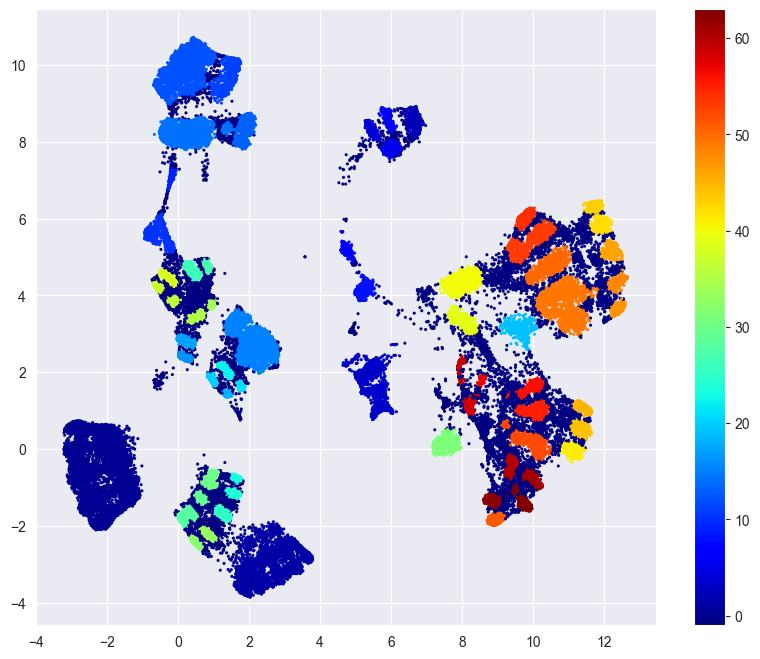

In [92]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], s=5, c=hdbscan_umap.labels_, edgecolors='none', cmap='jet')
plt.colorbar()